# Installing Dependencies

In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

In [3]:
os.path.join('data', 'happy')

'data/happy'

In [4]:
# Avoid OOM errors by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [6]:
len(gpus)

1

# Remove dodgy images


In [7]:
import cv2
import imghdr

In [8]:
data_dir = '/content/drive/MyDrive/data'

In [9]:
os.listdir(data_dir)

['happy', 'sad']

In [10]:
image_ext = ['jpeg', 'jpg', 'bmp', 'png']

In [11]:
image_ext

['jpeg', 'jpg', 'bmp', 'png']

In [12]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_ext:
        print("Image not in ext list {}".format(image_path))
        os.remove(image_path)
    except:
      print('Issue with image{}'.format(image_path))

# Load Data

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')

Found 305 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
data_iterator

In [17]:
batch = data_iterator.next()

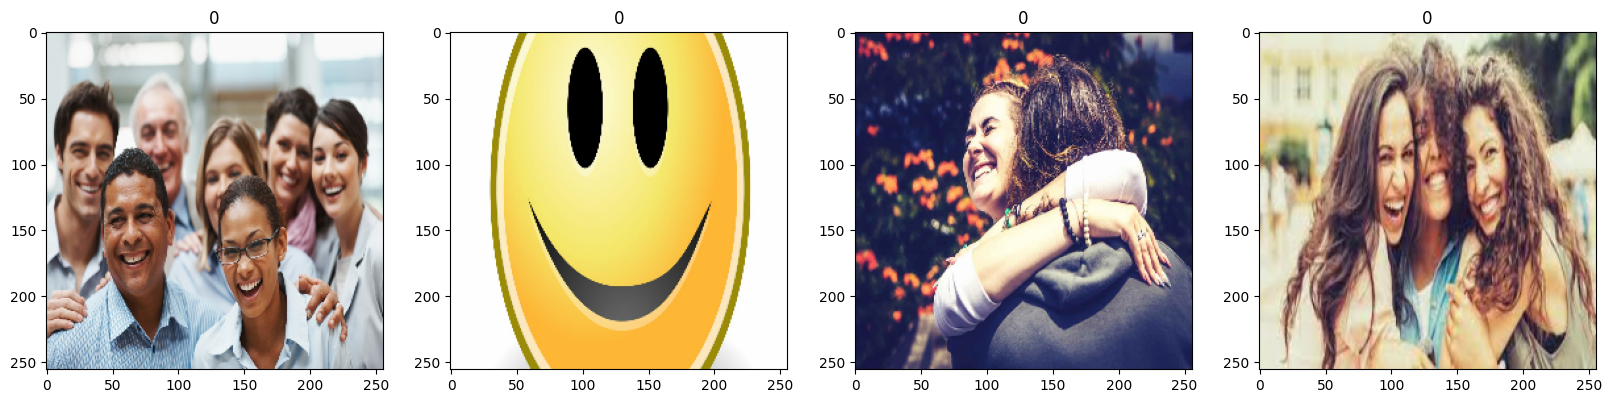

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocess data

In [19]:
scaled = batch[0] / 255

In [20]:
scaled.max()

1.0

## Scaling our data

In [21]:
data = data.map(lambda x, y: (x/255, y))

In [22]:
scaled_iterator = data.as_numpy_iterator()

In [23]:
batch = scaled_iterator.next()

In [24]:
batch[0].max()

1.0

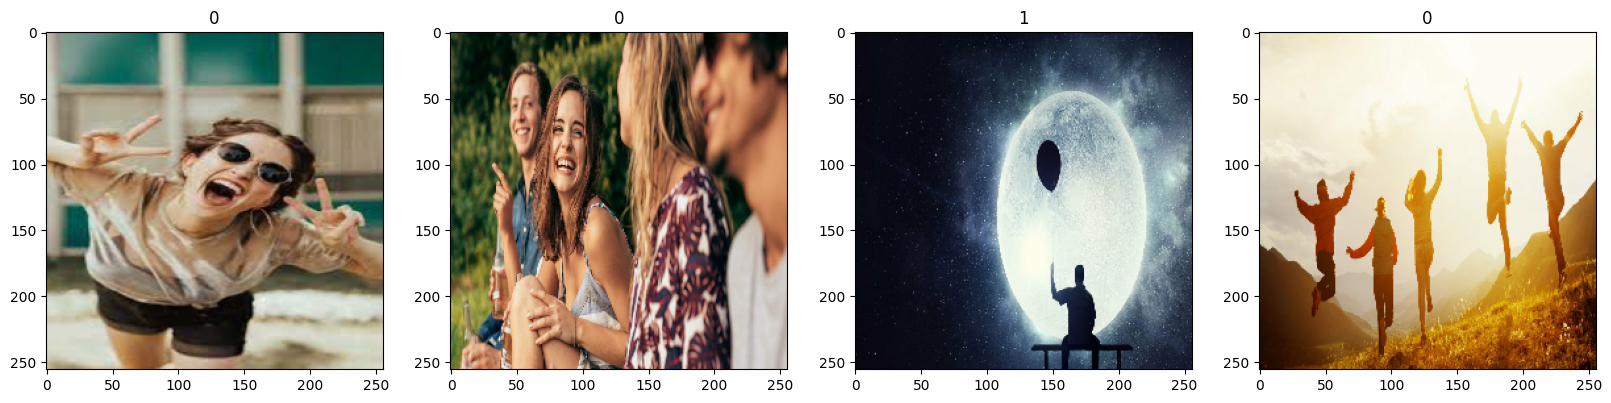

In [25]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

# Split data into train, test & validation

In [26]:
len(data)

10

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [28]:
train_size + val_size + test_size

10

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [30]:
len(train), len(val), len(test)

(7, 2, 1)

# Building Deep Neural Network

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [34]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

#Train

In [36]:
logdir = 'logs'

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [38]:
hist = model.fit(train, epochs = 30, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/30
7/7 [==============================] - 18s 559ms/step - loss: 0.9522 - accuracy: 0.5670 - val_loss: 0.6921 - val_accuracy: 0.5156
Epoch 2/30
7/7 [==============================] - 8s 814ms/step - loss: 0.6490 - accuracy: 0.5312 - val_loss: 0.5985 - val_accuracy: 0.7500
Epoch 3/30
7/7 [==============================] - 6s 600ms/step - loss: 0.5770 - accuracy: 0.7500 - val_loss: 0.5412 - val_accuracy: 0.7812
Epoch 4/30
7/7 [==============================] - 7s 789ms/step - loss: 0.5096 - accuracy: 0.7589 - val_loss: 0.4309 - val_accuracy: 0.8438
Epoch 5/30
7/7 [==============================] - 8s 913ms/step - loss: 0.3928 - accuracy: 0.8438 - val_loss: 0.3978 - val_accuracy: 0.8438
Epoch 6/30
7/7 [==============================] - 9s 839ms/step - loss: 0.3053 - accuracy: 0.8839 - val_loss: 0.2619 - val_accuracy: 0.9062
Epoch 7/30
7/7 [==============================] - 6s 540ms/step - loss: 0.2395 - accuracy: 0.9286 - val_loss: 0.1904 - val_accuracy: 0.9688
Epoch 8/30
7/7 [===

In [39]:
hist.history

{'loss': [0.9521932601928711,
  0.6490286588668823,
  0.5770024061203003,
  0.509600818157196,
  0.3927929699420929,
  0.3052791953086853,
  0.2394617795944214,
  0.21345989406108856,
  0.15903829038143158,
  0.09507738053798676,
  0.055551860481500626,
  0.0497499518096447,
  0.041277918964624405,
  0.030350472778081894,
  0.02181403897702694,
  0.02675207331776619,
  0.030278222635388374,
  0.018075067549943924,
  0.006834948901087046,
  0.0024252496659755707,
  0.02072395198047161,
  0.008673056028783321,
  0.009515996091067791,
  0.007206132169812918,
  0.003761505475267768,
  0.007470141630619764,
  0.008758901618421078,
  0.007646162528544664,
  0.007254505064338446,
  0.0032742235343903303],
 'accuracy': [0.5669642686843872,
  0.53125,
  0.75,
  0.7589285969734192,
  0.84375,
  0.8839285969734192,
  0.9285714030265808,
  0.9196428656578064,
  0.9598214030265808,
  0.9642857313156128,
  0.9910714030265808,
  0.9821428656578064,
  0.9910714030265808,
  0.9910714030265808,
  0.9955

# Plot Performance

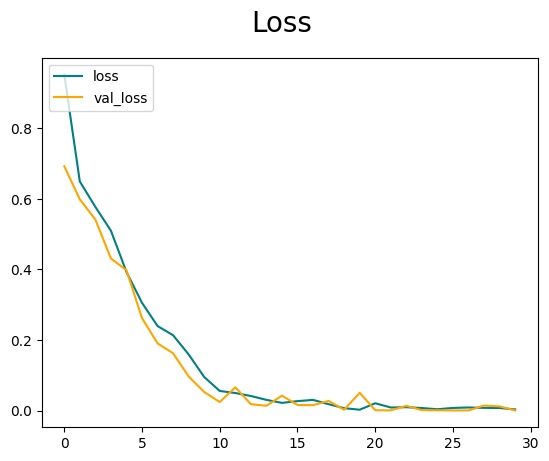

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

# Evaluate Performance

## Evaluate

In [43]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [44]:
pre = Precision()
re = Recall()
acc = Recall()

In [46]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 331ms/step


In [47]:
print(f'Accuracy: {acc.result().numpy()}, Recall: {re.result().numpy()}, Precision: {pre.result().numpy()}')

Accuracy: 1.0, Recall: 1.0, Precision: 1.0


# Test

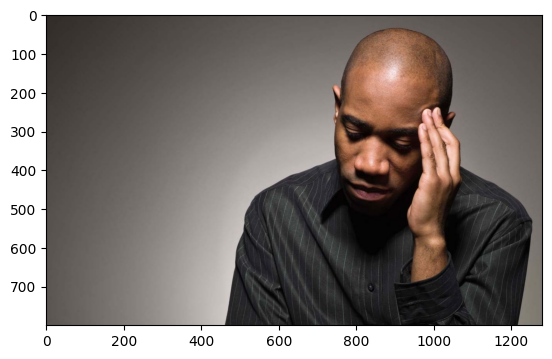

In [142]:
img = cv2.imread('/content/sadTest2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

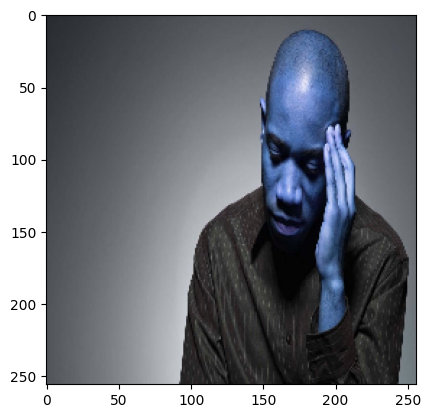

In [143]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [144]:
resize.shape

TensorShape([256, 256, 3])

In [145]:
# Add extra 1 Dimension to array, because Neural networks need batch of images
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [146]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 86ms/step


In [147]:
yhat

array([[0.88853467]], dtype=float32)

In [148]:
if yhat > 0.5:
  print(f'Predicted class is sad')
else:
  print(f'Predicted class is Happy')

Predicted class is sad


# Save the model

In [149]:
from tensorflow.keras.models import load_model

In [150]:
model.save(os.path.join('models', 'HappySadModel.h5'))

In [151]:
new_model = load_model(os.path.join('models', 'HappySadModel.h5'))

In [152]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 84ms/step


In [153]:
if yhat_new > 0.5:
  print(f'Predicted class is sad')
else:
  print(f'Predicted class is Happy')

Predicted class is sad
